In [60]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from pandas import Series, DataFrame, Panel
import matplotlib
import matplotlib.pyplot as plt

In [61]:
tour_data_df = pd.read_csv('tour_data.csv')

In [62]:
tour_data_df.head()

,uid,created_time,person_id,source,zpid,market,adjusted_cash_offer,date_sold_to_investor,zinvestor_purchase_price,date_initiated_beth_contract,date_sold_to_beth,postingdateinitial
0,X1-ORz1argtpx918a_aqaaf,2018-12-07 23:20:38,18780,Inspection,80425246,Atlanta,405300.0,2018-11-29 00:00:00,435000.0,2019-01-30 00:00:00,2019-03-08 00:00:00,2018-12-13 00:00:00
1,X1-ORz1argtpx918a_aqaaf,2018-12-07 23:20:34,18780,HCS,80425246,Atlanta,405300.0,2018-11-29 00:00:00,435000.0,2019-01-30 00:00:00,2019-03-08 00:00:00,2018-12-13 00:00:00
2,X1-ORz1dhug82mnp6_csqfg,2018-11-29 04:40:33,17813,HCS,7882316,Phoenix,237580.0,2018-07-30 00:00:00,260280.0,2019-01-19 00:00:00,2019-02-01 00:00:00,2018-08-18 00:00:00
3,X1-ORz1dhug82mnp6_csqfg,2018-08-22 01:42:27,9724,Inspection,7882316,Phoenix,237580.0,2018-07-30 00:00:00,260280.0,2019-01-19 00:00:00,2019-02-01 00:00:00,2018-08-18 00:00:00
4,X1-ORz1dhug82mnp6_csqfg,2018-08-18 07:49:12,9318,Inspection,7882316,Phoenix,237580.0,2018-07-30 00:00:00,260280.0,2019-01-19 00:00:00,2019-02-01 00:00:00,2018-08-18 00:00:00


In [63]:
tour_data_df['created_time'] = pd.to_datetime(tour_data_df['created_time'])
tour_data_df['date_sold_to_beth'] = pd.to_datetime(tour_data_df['date_sold_to_beth'])
tour_data_df['postingdateinitial'] = pd.to_datetime(tour_data_df['postingdateinitial'])
tour_data_df['date_sold_to_investor'] = pd.to_datetime(tour_data_df['date_sold_to_investor'])
tour_data_df['date_initiated_beth_contract'] = pd.to_datetime(tour_data_df['date_initiated_beth_contract'])

In [64]:
tour_data_df['source'].value_counts()

Lockbox       10162
HCS            2715
Tour           2273
Inspection     2075
Question        477
Name: source, dtype: int64

In [65]:
tour_data_df.groupby(['uid']).count()

,created_time,person_id,source,zpid,market,adjusted_cash_offer,date_sold_to_investor,zinvestor_purchase_price,date_initiated_beth_contract,date_sold_to_beth,postingdateinitial
uid,,,,,,,,,,,
X1-ORz19516xo30xm_a101x,12,12,12,12,12,12,12,12,12,12,12
X1-ORz19hwz577bzu_jgxo7,8,8,8,8,8,8,8,8,8,8,8
X1-ORz19ii8p6wmey_ebilv,25,25,25,25,25,25,25,25,25,25,25
X1-ORz19k40brmge2_d5djp,7,7,7,7,7,7,7,7,7,7,7
X1-ORz19kck4l70je_h1uex,16,16,16,16,16,16,16,16,16,16,16
X1-ORz19lqveyldve_b7543,9,9,9,9,9,9,9,9,9,9,9
X1-ORz19mzpe8q9oa_j8i9d,1,1,1,1,1,1,1,1,1,1,1
X1-ORz19nbrh1ic8q_anh5h,39,39,39,39,39,39,39,39,39,39,39
X1-ORz19onny1yanu_gi6gb,5,5,5,5,5,5,5,5,5,5,5


In [66]:
tour_data_df['dom'] = (tour_data_df.date_sold_to_beth - tour_data_df.postingdateinitial).dt.days
tour_data_df['tour_day'] = (tour_data_df.created_time - tour_data_df.postingdateinitial).dt.days
tour_data_df = tour_data_df[tour_data_df['tour_day'] >= 0]
higher_dom = tour_data_df[tour_data_df['dom'] > 30]

In [67]:
higher_dom

,uid,created_time,person_id,source,zpid,market,adjusted_cash_offer,date_sold_to_investor,zinvestor_purchase_price,date_initiated_beth_contract,date_sold_to_beth,postingdateinitial,dom,tour_day
2,X1-ORz1dhug82mnp6_csqfg,2018-11-29 04:40:33,17813,HCS,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,103.0
3,X1-ORz1dhug82mnp6_csqfg,2018-08-22 01:42:27,9724,Inspection,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,4.0
4,X1-ORz1dhug82mnp6_csqfg,2018-08-18 07:49:12,9318,Inspection,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,0.0
5,X1-ORz1dhug82mnp6_csqfg,2018-08-18 07:46:33,9318,Inspection,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,0.0
6,X1-ORz1dhug82mnp6_csqfg,2018-12-01 19:40:22,18070,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,105.0
7,X1-ORz1dhug82mnp6_csqfg,2018-11-20 00:10:24,16882,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,94.0
8,X1-ORz1dhug82mnp6_csqfg,2018-11-18 23:10:11,16963,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,92.0
9,X1-ORz1dhug82mnp6_csqfg,2018-11-17 23:00:02,16882,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,91.0
10,X1-ORz1dhug82mnp6_csqfg,2018-11-17 17:30:33,16824,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,91.0
11,X1-ORz1dhug82mnp6_csqfg,2018-11-15 23:49:57,16702,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,89.0


In [68]:
single_orid = tour_data_df[tour_data_df['uid'] == 'X1-ORz1dhug82mnp6_csqfg']

In [76]:
single_orid

,uid,created_time,person_id,source,zpid,market,adjusted_cash_offer,date_sold_to_investor,zinvestor_purchase_price,date_initiated_beth_contract,date_sold_to_beth,postingdateinitial,dom,tour_day
2,X1-ORz1dhug82mnp6_csqfg,2018-11-29 04:40:33,17813,HCS,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,103.0
3,X1-ORz1dhug82mnp6_csqfg,2018-08-22 01:42:27,9724,Inspection,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,4.0
4,X1-ORz1dhug82mnp6_csqfg,2018-08-18 07:49:12,9318,Inspection,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,0.0
5,X1-ORz1dhug82mnp6_csqfg,2018-08-18 07:46:33,9318,Inspection,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,0.0
6,X1-ORz1dhug82mnp6_csqfg,2018-12-01 19:40:22,18070,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,105.0
7,X1-ORz1dhug82mnp6_csqfg,2018-11-20 00:10:24,16882,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,94.0
8,X1-ORz1dhug82mnp6_csqfg,2018-11-18 23:10:11,16963,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,92.0
9,X1-ORz1dhug82mnp6_csqfg,2018-11-17 23:00:02,16882,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,91.0
10,X1-ORz1dhug82mnp6_csqfg,2018-11-17 17:30:33,16824,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,91.0
11,X1-ORz1dhug82mnp6_csqfg,2018-11-15 23:49:57,16702,Lockbox,7882316,Phoenix,237580.0,2018-07-30,260280.0,2019-01-19,2019-02-01,2018-08-18,167.0,89.0


In [70]:
# inspect single orid time series vs dom (maybe dom in legend, loop through a few zpids)
# filter all zipds to ones with dom > 30, plot first 30 days of tours (average for all of them)
# same individual inspection of time series for those (maybe leave average as guide to the eye)
# extracting summary features for time series for every zpid
# scatter plots with dom
# treat different sources separately

In [71]:
tour_histo = single_orid['tour_day']

In [72]:
tour_histo

2       103.0
3         4.0
4         0.0
5         0.0
6       105.0
7        94.0
8        92.0
9        91.0
10       91.0
11       89.0
12       88.0
13       86.0
14       84.0
15       84.0
16       84.0
17       84.0
18       83.0
19       78.0
20       75.0
21       75.0
22       71.0
23       68.0
24       68.0
25       56.0
26       53.0
27       50.0
28       44.0
29       42.0
30       41.0
31       32.0
        ...  
38       14.0
39        7.0
40        6.0
41        6.0
42        6.0
43        4.0
44        3.0
45        1.0
960     142.0
1002    167.0
1003    166.0
1004    160.0
1005    157.0
1006    155.0
1007    155.0
1008    154.0
1009    153.0
1010    150.0
1011    150.0
1012    148.0
1013    147.0
1014    146.0
1015    146.0
1016    139.0
1017    138.0
1018    136.0
1019    130.0
1020    125.0
1021    120.0
1022    112.0
Name: tour_day, Length: 66, dtype: float64

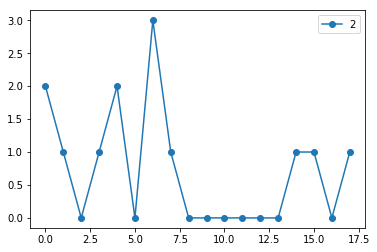

In [75]:
df_gb = single_orid.groupby('tour_day')['zpid'].count()

df_gb = df_gb.reindex(np.arange(18)).fillna(0)

plt.plot(df_gb,'-o', label=2)
plt.legend()
plt.show()

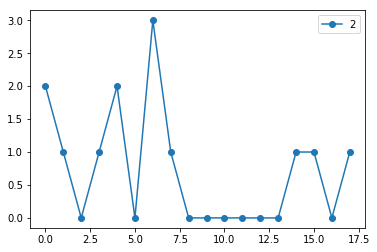

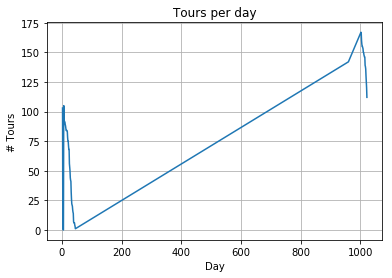

In [74]:
fig, ax = plt.subplots()
ax.plot(single_orid['tour_day'])
ax.set(xlabel='Day', ylabel='# Tours',
       title='Tours per day')
# ax.set_xticklabels(single_orid['tour_day'], rotation=60)
ax.grid()
plt.show()

In [122]:
n_bins = single_orid['tour_day'].max()
single_orid.plot.hist(grid=True, bins=n_bins, rwidth=0.9,
                   color='#607c8e')
plt.title('# of Tours/Day')
plt.xlabel('Day')
plt.ylabel('# Tours')
plt.grid(axis=single_orid['tour_day'], alpha=0.75)

ValueError: view limit minimum -688035.6166666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001D7A7E2E378> (for post_execute):


ValueError: view limit minimum -688035.6166666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -688035.6166666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>